<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/ML/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import shutil


In [0]:

# source_path = '/yishai_data (1).csv'
# source_path = '/topic_data.zip'
source_path = '/content/topic_data.csv'
# source_path = '/content/drive/My Drive/Colab Datasets/topic_data.csv'
# target_path = '/content/drive/My Drive/Colab Datasets/yishai_data.csv'
target_path = '/content/drive/My Drive/Colab Datasets/topic_data.csv'
# target_path = '/content/drive/My Drive/Colab Datasets/topic_data.zip'

# shutil.move(source_path, target_path)
# shutil.move("/abraham-sources.csv", "/content/drive/My Drive/Colab Datasets/abraham-sources.csv")
# encoding_type = "latin-1"
encoding_type = "utf-8"
# encoding_type = 'unicode_escape'
# encoding_type = "ISO-8859-1"


In [0]:
# !wget /content/drive/My Drive/Colab Datasets/topic_data.zip

/content/drive/My: Scheme missing.
--2020-06-14 14:55:24--  http://drive/Colab
Resolving drive (drive)... failed: No address associated with hostname.
wget: unable to resolve host address ‘drive’
--2020-06-14 14:55:24--  http://datasets/topic_data.zip
Resolving datasets (datasets)... failed: Name or service not known.
wget: unable to resolve host address ‘datasets’


In [0]:

# prayer_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/prayer-sources.csv', encoding=encoding_type)
# prayer_df['topic'] = 'prayer'

# not_prayer_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/not-prayer-sources.csv', encoding=encoding_type)
# not_prayer_df['topic'] = 'not_prayer'

# moses_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/moses-sources.csv', encoding=encoding_type)
# moses_df['Topics'] = 'moses'

# abraham_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/abraham-sources.csv', encoding=encoding_type)
# abraham_df['Topics'] = 'abraham'

big_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/yishai_data (1).csv',
                     encoding=encoding_type,
                    #  engine='python',
                    #  error_bad_lines=False
                    #  )[:]
                     )[:5000]

# big_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/yishai_data.csv',encoding="utf-8")
# big_df['En'] = big_df['En'].astype(str)
# df = df.reset_index(drop=True)

# df = big_df
df = pd.concat([
                # prayer_df,
                # not_prayer_df,
                moses_df,
                abraham_df,
                # big_df
                ])

# df.head()

NameError: ignored

In [0]:


# print(big_df.info)
# big_df.shape
# small_df = big_df[:1000]
# df = big_df
# df.sample(13)
# df['Topics'] = df['Topics'].astype(str)

# print("\nNulls before dropping:",df.isnull().sum()[0])
# df.dropna(how = 'any', inplace=True)
# print("Nulls after dropping:",df.isnull().sum()[0])

print("Before dropping nulls",df.shape)
# df.dropna(how = 'any', inplace=True)
df.dropna(inplace=True)
# df.drop_duplicates(inplace=True)
print("After dropping nulls",df.shape)
print()

print("Before dropping duplicates",df.shape)
df.drop_duplicates(inplace=True)
print("After dropping duplicates",df.shape)

# df['En'] = df['En'].astype(str)

# df = df.reset_index(drop=True)
print()
df.info()


Before dropping nulls (1382, 4)
After dropping nulls (762, 4)

Before dropping duplicates (762, 4)
After dropping duplicates (754, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 646
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ref     754 non-null    object
 1   En      754 non-null    object
 2   He      754 non-null    object
 3   Topics  754 non-null    object
dtypes: object(4)
memory usage: 29.5+ KB


In [0]:

# all_prayer_df.sample(5)# null_filter = df["En"] != ""
# df = df[null_filter]
print()
df.sample(3)


,Ref,En,He,Topics
147,Rashi on Genesis 15:6:1-2,'והאמין בה AND HE BELIEVED IN THE LORD — He di...,והאמין בה'. לֹא שָׁאַל לוֹ אוֹת עַל זֹאת; אֲבָ...,abraham
2,Deuteronomy 34:10,And there hath not arisen a prophet since in I...,וְלֹֽא־קָ֨ם נָבִ֥יא ע֛וֹד בְּיִשְׂרָאֵ֖ל כְּמֹ...,moses
520,Vayikra Rabbah 13:1,R. Simeon ben Yohai began his discourse with t...,וַיְדַבֵּר ה' אֶל משֶׁה וְאֶל אַהֲרֹן לֵאמֹר א...,moses


In [0]:

# df = df[['En','topic']]
# df['topic'].str.split()
# df = df.join(df.pop('topic').str.get_dummies())
# df = df.join(df.pop('topic').str.get_dummies(' '))
# df.sample(9)
df = df[['En','Topics']]
df['Topics'].str.split()
df = df.join(df.pop('Topics').str.get_dummies(' '))
# df.head(3)

In [0]:
topics = list(df.columns)
del topics[0]
hits = {topic:df[topic].sum() for topic in topics}
from collections import Counter
counter = Counter(hits)
for topic, num in counter.most_common(10):
     print( '%s: %i' % (topic, num))

procedures-for-judges-and-conduct-towards-them: 48
laws-of-judges-and-courts: 46
laws-of-transferring-between-domains: 43
laws-of-the-prohibitions-of-eating-meat: 39
cecum: 35
financial-ramifications-of-marriage: 33
laws-of-the-impurity-and-prohibition-of-a-menstruant-woman: 33
laws-of-animal-sacrifices: 32
prayer: 32
dinei-yibum: 30


In [0]:
labels = df[topics]
labels.head(3)


,abraham,moses
0,0,1
1,0,1
2,0,1


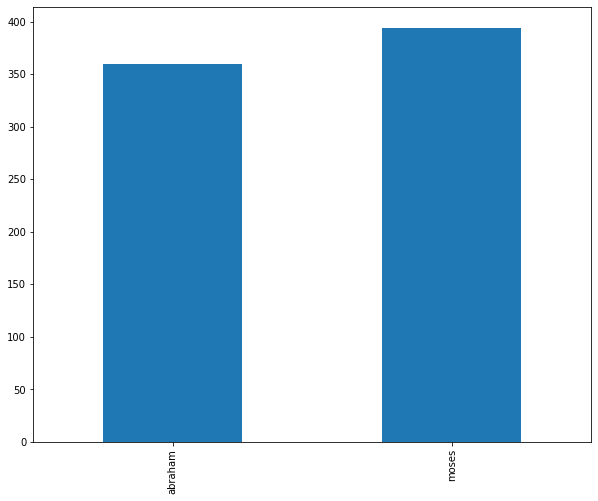

In [0]:

import matplotlib as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels.sum(axis=0).plot.bar()

In [0]:
from bs4 import BeautifulSoup
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def preprocess_text(sentence):

    sentence = BeautifulSoup(sentence, "lxml").text # HTML decoding
    sentence = sentence.lower() # lowercase text

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    sentence = ' '.join(word for word in sentence.split() if word not in STOPWORDS) # delete stopwors from text

    return sentence

# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

# # BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

# # BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_ \b\d+\b]')

# def process_text(text):
#     #  text = BeautifulSoup(text, "lxml").text # HTML decoding
#     text = text.lower() # lowercase text
#     text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
#     text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
#     text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
#     return text

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
print()
preprocess_text(sample_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



'abc une gns ac pien p'

In [0]:
df.sample(5)

,En,abraham,moses
293,"And Moses and Aaron went in unto Pharaoh, and ...",0,1
158,"Abdon, the shortened form of the name of Rabbi...",0,1
316,"And it came to pass, as soon as he came nigh u...",0,1
113,5 Another interpretation (of Numb. 31:2) “Exac...,0,1
506,"Such love as this, which considers only the in...",1,0


In [0]:
processed_df = df
processed_df['En'] = processed_df['En'].apply(preprocess_text)
processed_df.head(5)

,En,abraham,moses
0,woman conceived bore son saw goodly child hid ...,0,1
1,man moses meek men upon face earth lord spoke ...,0,1
2,hath arisen prophet since israel like unto mos...,0,1
3,said lord unto though moses samuel stood yet m...,0,1
4,moses aaron among priests samuel among call up...,0,1


In [0]:
# all_prayer_df['En'] = all_prayer_df['En'].apply(stemming)
# all_prayer_df.head()
stemmed_df = processed_df
# stemmed_df['En'] = stemmed_df['En'].apply(stemming)
stemmed_df.head()

,En,abraham,moses
0,woman conceived bore son saw goodly child hid ...,0,1
1,man moses meek men upon face earth lord spoke ...,0,1
2,hath arisen prophet since israel like unto mos...,0,1
3,said lord unto though moses samuel stood yet m...,0,1
4,moses aaron among priests samuel among call up...,0,1


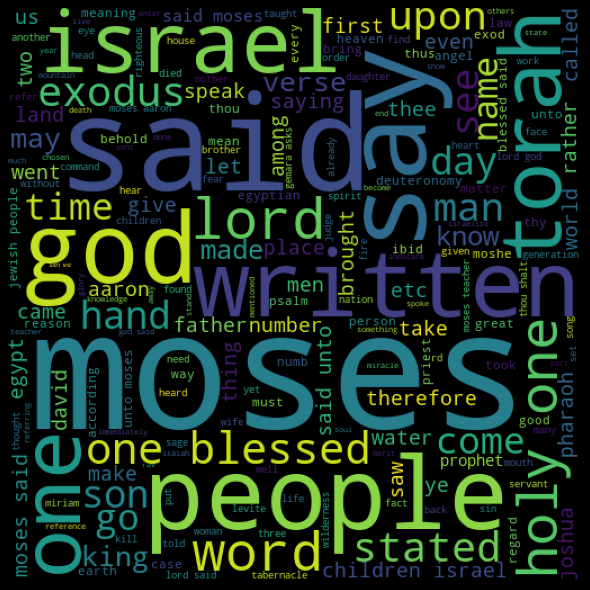

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

moses_words = ' '.join(list(df[df['moses'] == 1]['En']))
# moses_words = ' '.join(list(df[stemmed_df['moses'] == 1]['En']))
moses_wc = WordCloud(width = 512,height = 512).generate(moses_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(moses_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

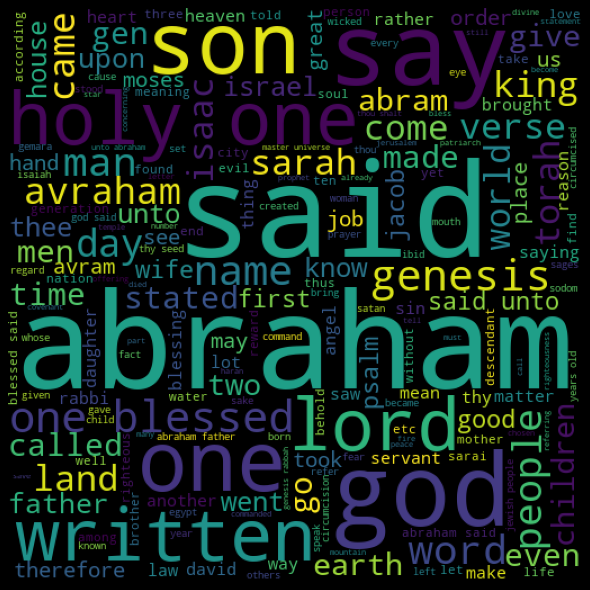

In [0]:
abraham_words = ' '.join(list(df[df['abraham'] == 1]['En']))
abraham_wc = WordCloud(width = 512,height = 512).generate(abraham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(abraham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
# not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 0]['En']))
# not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
# plt.figure(figsize = (10, 8), facecolor = 'k')
# plt.imshow(not_prayer_wc)
# plt.axis('off')
# plt.tight_layout(pad = 0)
# plt.show()

In [0]:
import re

X = []
sentences = list(df["En"])
for sen in sentences:
    X.append(preprocess_text(sen))

X = pd.DataFrame(np.array(X))
# print (df)
 
y = labels.values
y = pd.DataFrame(np.array(y))


In [0]:
X[:5]

,0
0,woman conceived bore son saw goodly child hid ...
1,man moses meek men upon face earth lord spoke ...
2,hath arisen prophet since israel like unto mos...
3,said lord unto though moses samuel stood yet m...
4,moses aaron among priests samuel among call up...


In [0]:
y[:5]

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [0]:
# rule based approach
# input: list of sentences.
# output: name of topic
# example: 'abraham live to 175' --> 'abraham' 

'''

'''
# algorithm = 'rule-based'
# algorithm = 'machine-learning'
# algorithm = 'deep-learning'


'\n\n'

In [0]:
# if algorithm == 'rule-based':


In [0]:
# if algorithm == 'machine-learning':

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [0]:
# X_train 
X_test

,0
587,
259,people guilty indulging immoral acts yet torah...
653,came pass abram come egypt egyptians beheld wo...
77,alternatively implied people would fulfil comm...
213,foreigner although lived midian married althou...
...,...
593,said abram etc two reasons unusual phenomenon ...
90,exodus az yashir mosheh az sometimes signals p...
357,lord said unto moses behold thy days approach ...
208,may add thousand times many ye force saying ma...


In [0]:
# y_train
y_test

,0,1
587,1,0
259,0,1
653,1,0
77,0,1
213,0,1
...,...,...
593,1,0
90,0,1
357,0,1
208,0,1


In [0]:
for matrix_name, matrix in {
    'X_train':X_train, 
    'y_train':y_train, 
    'X_test':X_test, 
    'y_test':y_test
    }.items():
      print(matrix_name, matrix.shape)

X_train (603, 1)
y_train (603, 2)
X_test (151, 1)
y_test (151, 2)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


Using TensorFlow backend.


In [0]:
for matrix_name, matrix in {
    'X_train':X_train, 
    'y_train':y_train, 
    'X_test':X_test, 
    'y_test':y_test
    }.items():
      print(matrix_name, matrix.shape)

AttributeError: ignored

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/Colab Datasets/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [0]:
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, LSTM
from keras.layers.core import Activation, Dropout, Dense
from keras.models import Model

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
print(model.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 100)          1128100   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,245,735
Trainable params: 117,635
Non-trainable params: 1,128,100
_________________________________________________________________
None


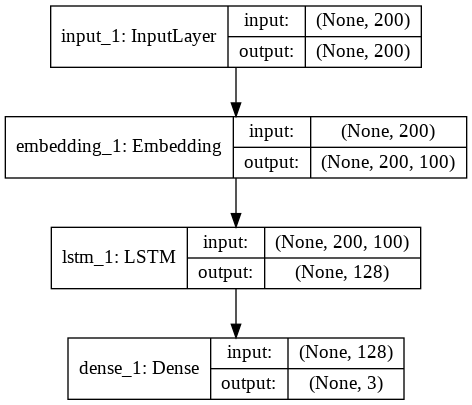

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)


In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)


Train on 836 samples, validate on 209 samples
Epoch 1/5
836/836 [==============================] - 6s 8ms/step - loss: 0.6763 - acc: 0.6515 - val_loss: 0.6675 - val_acc: 0.6667
Epoch 2/5
836/836 [==============================] - 6s 7ms/step - loss: 0.6570 - acc: 0.6667 - val_loss: 0.6500 - val_acc: 0.6683
Epoch 3/5
836/836 [==============================] - 6s 7ms/step - loss: 0.6246 - acc: 0.6726 - val_loss: 0.6408 - val_acc: 0.6715
Epoch 4/5
836/836 [==============================] - 6s 7ms/step - loss: 0.6140 - acc: 0.6762 - val_loss: 0.6294 - val_acc: 0.6794
Epoch 5/5
836/836 [==============================] - 6s 7ms/step - loss: 0.6059 - acc: 0.6894 - val_loss: 0.6211 - val_acc: 0.6810


In [0]:
# prayer_df.sample(3)

In [0]:
# prayer_df['is_prayer'] = 'yes'
# prayer_df = prayer_df[['En','is_prayer']]

# prayer_df.tail(3)

In [0]:
# not_prayer_df.sample(3)

In [0]:
# not_prayer_df['is_prayer'] = 'no'
# not_prayer_df = not_prayer_df[['En','is_prayer']]
# not_prayer_df.sample(3)

In [0]:
# all_prayer_frames = [prayer_df, not_prayer_df]
# all_prayer_df = pd.concat(all_prayer_frames)
# all_prayer_df.reset_index(inplace=True)
# all_prayer_df=all_prayer_df.rename(columns = {'En':'english_text'})


# # all_prayer_df.style.set_properties({'align': 'right'})

# # all_prayer_df.tail(3)
# all_prayer_df.sample(5)
big_df.sample(5)
# # all_prayer_df.loc[[345]]

,index,english_text,is_prayer
273,273,"'××ª×§×¨× ×©× ×, the meaning of the words ...",yes
83,83,And Moses and Aaron went out from Pharaoh; and...,yes
1376,324,"And furthermore, if it should enter your mind ...",no
343,343,The Gemara relates another incident involving ...,yes
569,569,NaN,yes


In [0]:
del all_prayer_df['index']

all_prayer_df.sample(3)

,english_text,is_prayer
1980,NaN,no
217,NaN,yes
1342,MISHNA: All foods that became ritually impure ...,no


In [0]:
shape = all_prayer_df.shape
print(f"{shape[0]} rows and {shape[1]} columns")

1221 rows and 2 columns


In [0]:
all_prayer_df['is_prayer'] = all_prayer_df['is_prayer'].map({'no': 0, 'yes': 1})
all_prayer_df.sample(5)

,english_text,is_prayer
1340,"The Jewish neighbors came and spoke to Abaye, ...",0
996,The Gemara asks: Is that to say that one who r...,1
281,"And furthermore, Rabbi Yosei said: May my port...",1
1638,"When Jehoiakim came along and reigned, he said...",0
15,On the topic of prayers recited while travelin...,1


In [0]:
print('Prayer:', (all_prayer_df.is_prayer.values == 1).sum())
print('Not prayer:', (all_prayer_df.is_prayer.values == 0).sum())

Prayer: 553
Not prayer: 668


In [0]:
# import re
# import nltk
# import string
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

# # BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

# # BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_ \b\d+\b]')
# STOPWORDS = set(stopwords.words('english'))

# def process_text(text):
#     #  text = BeautifulSoup(text, "lxml").text # HTML decoding
#     text = text.lower() # lowercase text
#     text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
#     text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
#     text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
#     return text

# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer("english")

# def stemming(sentence):
#     stemSentence = ""
#     for word in sentence.split():
#         stem = stemmer.stem(word)
#         stemSentence += stem
#         stemSentence += " "
#     stemSentence = stemSentence.strip()
#     return stemSentence

# whitelist = set('abcdefghijklmnopqrstuvwxyz ZXCVBNMASDFGHJKLQWERTYUIOP')
# genres['movie_id'] = genres['movie_id'].astype(str)

# def process_text(text):
#     '''
#     1. Keep only letters and spaces
#     2. Remove stopwords
#     3. Return str of clean text words
#     '''
#     #1
#     chars_str = ''.join(filter(whitelist.__contains__, text))
#     #2
#     clean_words = [word.lower() for word in chars_str.split() if word.lower() not in stopwords.words('english')]
#     #3
#     return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df = stemmed_df
df.head()

,english_text,is_prayer
0,anoth abba binyamin statement regard law praye...,1
1,taught baraita abba binyamin said one prayer f...,1
2,addit ravin bar rav adda said rabbi yitzak sai...,1
3,similar taught baraita rabbi yishmael ben elis...,1
4,mean written let prayer unto lord time favor g...,1


In [0]:
from keras.preprocessing.sequence import pad_sequences
X = df['english_text']
# X = tokenizer.texts_to_sequences(df['english_text'].values)
# X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1221,)


In [0]:
Y = pd.get_dummies(df['is_prayer']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (1221, 2)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(1098,) (1098, 2)
(123,) (123, 2)


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', oov_token="<OOV>", lower=True)
tokenizer.fit_on_texts(X_train)
# tokenizer.fit_on_texts(df['english_text'].values)


In [0]:

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
# X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X.shape)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)


AttributeError: ignored

In [0]:


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



In [0]:
"""
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
"""

In [0]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.core import Dense, SpatialDropout1D
# from tensorflow.python.keras.layers.recurrent import LSTM
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
# model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
batch_size = 64

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [0]:
# X = df.english_text
# y = df.is_prayer
# print(f"Totals: {X.shape} / {y.shape}")

# from sklearn.model_selection import train_test_split

# # train, test = train_test_split(movies, random_state=42, test_size=0.30, shuffle=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56, test_size=0.20, shuffle=True)

# print(f"\nTrain: {X_train.shape} / {y_train.shape}")

# print(f"\nTest: {X_test.shape} / {y_test.shape}")

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

history = model.fit(X_train, Y_train, 
                    epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

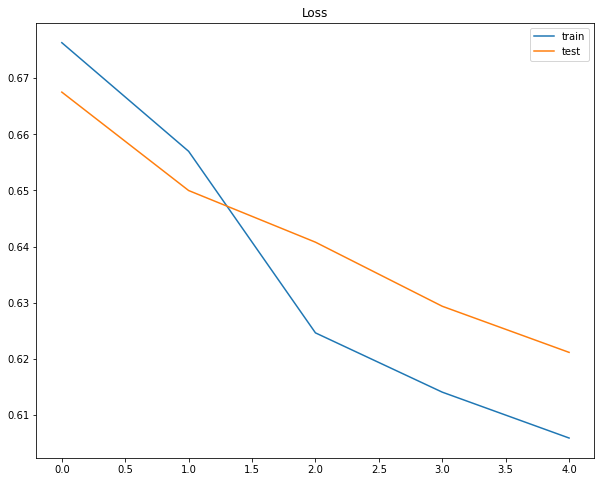

In [0]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


In [0]:
model.metrics_names


['loss', 'acc']

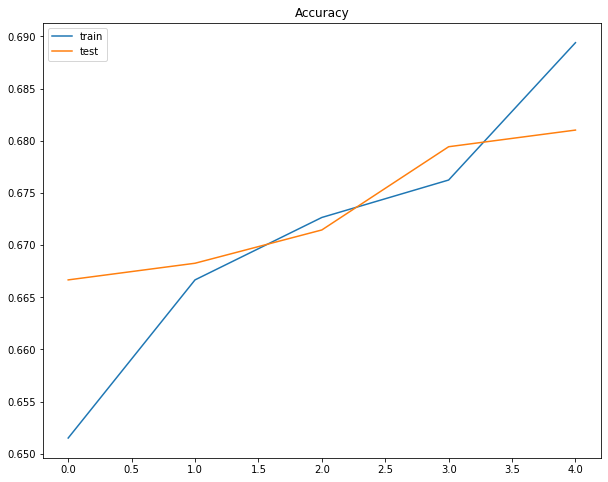

In [0]:
plt.title('Accuracy')
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();


In [0]:
new_complaint = ['I am a abraham to open up .']
# new_complaint = ['I am a pray pray pray pray to open up .']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=maxlen)
# padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['moses','abraham','prayer']
print(pred, labels[np.argmax(pred)])

[[0.25726274 0.37398458 0.41063678]] prayer


In [0]:
# # Convert a collection of text documents to a matrix of token counts

# from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# # vectorizer = CountVectorizer(analyzer=process_text)
# # vectorizer = CountVectorizer(ngram_range=(2, 4))
# # vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
# vectorizer = TfidfVectorizer(
#     # strip_accents='unicode', 
#     # analyzer='word', 
#     ngram_range=(1,3), 
#     # norm='l2', 
#     # max_features = 15000
#     # max_features = 12000
#     max_features = 10000
#     # max_features = 8000
#     # max_features = 5000
#     )

# # vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# # vectorizer.fit(X_train)
# # vectorizer.get_feature_names()


In [0]:
# print("Shape of document term matrix")

# # X_train_dtm = vectorizer.transform(X_train)
# X_train_dtm = vectorizer.fit_transform(X_train)
# print(f"Train: {X_train_dtm.shape}")

# # prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])
# X_test_dtm = vectorizer.transform(X_test)
# print(f"Test: {X_test_dtm.shape}")


In [0]:

# print(vectorizer.get_feature_names())


In [0]:
# from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

# classifier = MultinomialNB()
# # classifier = ComplementNB()

# # for Gaussian need array format
# # X_train = X_train.toarray()
# # X_test = X_test.toarray()
# # classifier = GaussianNB()
# # classifier = BernoulliNB()

# %time classifier.fit(X_train_dtm, y_train)
# y_pred_class = classifier.predict(X_test_dtm)
# from sklearn import metrics

# print(f"\nBreakdown:\n{y_test.value_counts()[0]} non-prayer (0), and\n{y_test.value_counts()[1]} prayer (1)")

# null_accuracy = y_test.value_counts().head(1) / len(y_test)
# print(f'\nNull accuracy: {null_accuracy[0]}')

# non_prayer_passages = y_test.value_counts()[0]
# prayer_passages = y_test.value_counts()[1]
# print('Manual null accuracy:',(prayer_passages / (prayer_passages + non_prayer_passages)))

# print('\nAccuracy:',round(metrics.accuracy_score(y_test, y_pred_class),2))
# print('Precision:',round(metrics.precision_score(y_test, y_pred_class),2))
# print('Recall:',round(metrics.recall_score(y_test, y_pred_class),2))
# print('F1 score:',round(metrics.f1_score(y_test, y_pred_class),2))

# print("\nConfusion Matrix:")
# print(metrics.confusion_matrix(y_test, y_pred_class))


In [0]:

# from sklearn.model_selection import cross_val_score
# # clf = svm.SVC(kernel='linear', C=1)
# scores = cross_val_score(classifier, X, y, cv=5)
# scores


In [0]:
# TP = X_test[y_pred_class + y_test == 2]
# TN = X_test[y_pred_class + y_test == 0]
# FP = X_test[y_pred_class > y_test]
# FN = X_test[y_pred_class < y_test]

# pd.options.display.max_colwidth = 100

# # pd.style.set_properties(**{'text-align': 'left'})

# # print("\n*** TP ***")
# # print(TP.sample(5))
# # print("\n*** TN ***")
# # print(TN.sample(5))
# print("*** False Positives: Actually NOT prayer, but misclassified as prayer ***\n")
# print(FP.sample(10))
# print("\n\n*** False Negatives: Actually prayer, but misclassified as NOT prayer ***\n")
# print(FN.sample(10))

In [0]:
# FP.to_csv('FP', sep='\t', encoding='utf-8')
# FN.to_csv('FN', sep='\t', encoding='utf-8')
